In [5]:
from sklearn.externals import joblib
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels


In [6]:
with open('classes.txt') as file:
    lines=file.read()
    
#print(lines)
lines=lines.split('\n')
lines=lines[0:10]
lines


['Society & Culture',
 'Science & Mathematics',
 'Health',
 'Education & Reference',
 'Computers & Internet',
 'Sports',
 'Business & Finance',
 'Hobbies',
 'Family & Relationships',
 'Politics & Government']

In [7]:
df = pd.read_csv("train.csv", header = None)
df.head()

# df[2].fillna('N', inplace = True) 
# df.sort_values(by = [0])
# df.reset_index(inplace =True)
# df.drop(columns = ['index', 0, 5, 7], inplace = True)
df.columns = ['label', 'sentences', '', '']
df.head()

,label,sentences,,
0,5,why doesn't an optical mouse work on a glass t...,or even on some surfaces?,Optical mice use an LED and a camera to rapidl...
1,6,What is the best off-road motorcycle trail ?,long-distance trail throughout CA,i hear that the mojave road is amazing!<br />\...
2,3,What is Trans Fat? How to reduce that?,I heard that tras fat is bad for the body. Wh...,Trans fats occur in manufactured foods during ...
3,7,How many planes Fedex has?,I heard that it is the largest airline in the ...,according to the www.fedex.com web site:\nAir ...
4,7,"In the san francisco bay area, does it make se...",the prices of rent and the price of buying doe...,renting vs buying depends on your goals. <br /...


In [8]:
df = df.iloc[:,0:2]
df.head()

,label,sentences
0,5,why doesn't an optical mouse work on a glass t...
1,6,What is the best off-road motorcycle trail ?
2,3,What is Trans Fat? How to reduce that?
3,7,How many planes Fedex has?
4,7,"In the san francisco bay area, does it make se..."


In [9]:
# from sklearn.model_selection import train_test_split
# X_tr, X_te, y_train, y_test = train_test_split(df['sentences'], df['label'], random_state=100)

In [10]:
X=df['sentences']
y=df['label']

In [11]:
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# vector = CountVectorizer(stop_words = 'english')
# X_train_cv = vector.fit_transform(X_tr)
# tfidf_transformer = TfidfTransformer()
# X_train = tfidf_transformer.fit_transform(X_train_cv)
# X_train.shape

In [12]:
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# vector = CountVectorizer(stop_words = 'english')
# X_train_cv = vector.fit_transform(df['sentences'])
# tfidf_transformer = TfidfTransformer()
# X_train = tfidf_transformer.fit_transform(X_train_cv)
# X_train.shape

In [13]:
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB().fit(X_train, df['label'])
# X_test_cv = vector.transform(X_te)
# X_test = tfidf_transformer.transform(X_test_cv)
# clf.score(X_test, y_test)

In [14]:
pipe = make_pipeline(CountVectorizer(), TfidfTransformer(), MultinomialNB())

In [15]:
pipe.fit(X, y)
joblib.dump(pipe, 'newSavedModel.pkl')

['newSavedModel.pkl']

In [16]:
from sklearn.externals import joblib
pipe = joblib.load('newSavedModel.pkl')
array = ["indian dancer", "games", "operational non operational", "stock market", "symptoms fever"]
predictions=pipe.predict(array)
for i in predictions:
    print(lines[i-1])

Hobbies
Sports
Education & Reference
Business & Finance
Health


In [17]:
# array = ["u play this sport", "classify operational versus non-operational ", "stock market", "classification problem", "How to determine symptoms of fever"]
# tst = vector.transform(array)
# values = tfidf_transformer.transform(tst)
# predictions=clf.predict(values)
# for i in predictions:
#     print(lines[i-1])

In [18]:
test = pd.read_csv("test.csv")
test.head()

test.columns = ['label', 'sentences', '', '']
test=test.iloc[:,0:2]
test.head()

,label,sentences
0,2,Why does Zebras have stripes?
1,4,What did the itsy bitsy sipder climb up?
2,4,What is the difference between a Bachelors and...
3,3,Why do women get PMS?
4,3,If your co-worker is guilty of unsanitary hygi...


In [19]:
y_label=test['label']

In [20]:
final_test=test['sentences']

In [21]:
# print(final_test.shape)
# print(y_label.shape)

In [22]:
# x_test_cv = vector.transform(final_test)
# x_test = tfidf_transformer.transform(x_test_cv)
# clf.score(x_test, y_label)

In [23]:
#joblib.dump(clf,'saved_model.pkl')

#print(type(x_test))
#clf_from_saved=joblib.load('saved_model.pkl')

y_pred=pipe.predict(final_test)
for i in y_pred[:10]:
    print(lines[i-1]+" ")


Science & Mathematics 
Hobbies 
Education & Reference 
Health 
Family & Relationships 
Computers & Internet 
Health 
Science & Mathematics 
Hobbies 
Society & Culture 


Confusion matrix, without normalization
[[3275  162  222  375   79   90  243  325  830  399]
 [ 237 4122  431  487  132   90  141  110  127  123]
 [ 179  215 4481  147   47   48  141   94  580   68]
 [ 455  858  220 2725  203  140  392  266  318  423]
 [  53   94   29  160 5094   34  264  120  113   39]
 [  78  118  129   87   76 4950  135  187  152   88]
 [ 428  242  291  382  381  123 2906  330  567  350]
 [ 356  111  151  143  329  191  168 3938  490  123]
 [ 313   43  239  102   94   65  177  208 4623  135]
 [ 382  109   64  208   63   91  450   94  203 4336]]
Normalized confusion matrix
[[0.55 0.03 0.04 0.06 0.01 0.01 0.04 0.05 0.14 0.07]
 [0.04 0.69 0.07 0.08 0.02 0.01 0.02 0.02 0.02 0.02]
 [0.03 0.04 0.75 0.02 0.01 0.01 0.02 0.02 0.1  0.01]
 [0.08 0.14 0.04 0.45 0.03 0.02 0.07 0.04 0.05 0.07]
 [0.01 0.02 0.   0.03 0.85 0.01 0.04 0.02 0.02 0.01]
 [0.01 0.02 0.02 0.01 0.01 0.82 0.02 0.03 0.03 0.01]
 [0.07 0.04 0.05 0.06 0.06 0.02 0.48 0.06 0.09 0.06]
 [0.06 0.02 0.03 0.02 0.05 0.0

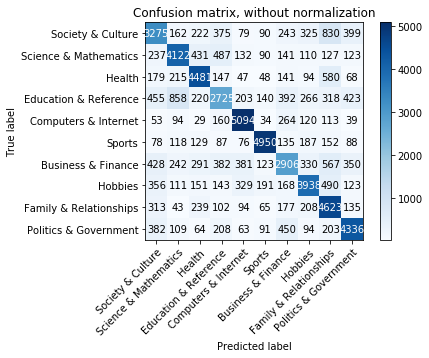

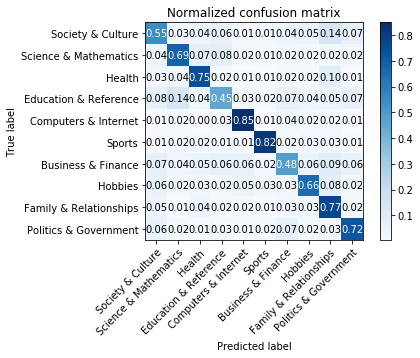

In [24]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_label, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_label, y_pred)]
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
   # fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_label, y_pred, classes=lines,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_label, y_pred, classes=lines, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [25]:
report=classification_report(y_label,y_pred)
print(report)
type(report)


              precision    recall  f1-score   support

           1       0.57      0.55      0.56      6000
           2       0.68      0.69      0.68      6000
           3       0.72      0.75      0.73      6000
           4       0.57      0.45      0.50      6000
           5       0.78      0.85      0.82      6000
           6       0.85      0.82      0.84      6000
           7       0.58      0.48      0.53      6000
           8       0.69      0.66      0.67      6000
           9       0.58      0.77      0.66      5999
          10       0.71      0.72      0.72      6000

   micro avg       0.67      0.67      0.67     59999
   macro avg       0.67      0.67      0.67     59999
weighted avg       0.67      0.67      0.67     59999



str